In [1]:
'''
Code to reconstruct missing data in dataset/match_history.csv using average
score values for each country
'''
import csv
import matplotlib.pyplot as plt

HOME_FEATURE_INDEXES = [9, 17, 19, 20, 21]
AWAY_FEATURE_INDEXES = [10, 18, 22, 23, 24]
HOME_TEAM_FIFA_RANK = 5
AWAY_TEAM_FIFA_RANK = 6

def plot_fifa_score(original_data: str) -> []:
    '''
    Pull data from the given csv and plot 5 graphs, of score, offense score,
    defense score, midfield score and goalkeeper score against FIFA rank.
    '''
    result = []
    
    with open(original_data) as csv_in_file:
        csv_reader = csv.reader(csv_in_file)
        next(csv_reader) # Skip the column headers

        ranks = []
        # features = [scores, gk_scores, def_scores, off_scores, mid_scores]
        features = [[], [], [], [], []]
        plot_colours = ['b','r','g','y','m']
        plot_titles = ['Score', 'Goalkeeper', 'Defense', 'Offense', 'Midfield']

        for row in csv_reader:
            # Extract the 5 types of score from the given csv for
            home_features = [row[i] for i in HOME_FEATURE_INDEXES]
            away_features = [row[i] for i in AWAY_FEATURE_INDEXES]

            # Only append the data to the lists is it is fully intact
            if '' not in home_features and '' not in away_features:
                ranks.append(int(row[HOME_TEAM_FIFA_RANK]))
                ranks.append(int(row[AWAY_TEAM_FIFA_RANK]))
                for i in range(5):
                    features[i].append(float(home_features[i]))
                    features[i].append(float(away_features[i]))

        # Create a figure with 5 subplots - one for each type of score
        fig, axs = plt.subplots(5,1, constrained_layout=True)
        fig.suptitle('A plot of different score metrics by FIFA ranking')

        # Zip the data, colour and title lists for the subplots
        plot_data = zip(plot_colours, plot_titles, features)
        for i, data in enumerate(plot_data):
            # For each score, plot it against the corresponding FIFA ranking
            axs[i].scatter(ranks, data[2], s=10, c=data[0], marker='.')
            axs[i].set_title(f'{data[1]} by FIFA rank')
            axs[i].set_xlabel('FIFA rank')
            axs[i].set_ylabel('Score')

        plt.show()
        
        result.append(ranks)
        result.append(features)
        
        return result


def write_missing_data(original_data: str, reconstructed_data: str,
                        countries: dict) -> None:
    '''
    For each row in the input csv, write to the output csv filling in missisng
    values, with that countries average for that feature.
    '''

    with open(original_data) as csv_in_file, open(reconstructed_data, 'w') as csv_out_file:
        csv_reader = csv.reader(csv_in_file)
        csv_writer = csv.writer(csv_out_file)
        csv_writer.writerow(next(csv_reader))

        for row in csv_reader:
            for i, val in enumerate(row):
                if val == '':
                    if i in HOME_FEATURE_INDEXES:
                        replace_index = HOME_FEATURE_INDEXES.index(i)
                        row[i] = countries[row[1]][replace_index]
                    elif i in AWAY_FEATURE_INDEXES:
                        replace_index = AWAY_FEATURE_INDEXES.index(i)
                        row[i] = countries[row[2]][replace_index]
            csv_writer.writerow(row)


def get_averages(original_data: str) -> dict:
    '''
    Find average values for each 5 features for each country.
    '''

    countries = {}

    with open(original_data) as csv_file:
        csv_reader = csv.reader(csv_file)
        next(csv_reader)

        for row in csv_reader:
            home_country, away_country = row[1], row[2]
            home_features = [row[i] for i in HOME_FEATURE_INDEXES]
            away_features = [row[i] for i in AWAY_FEATURE_INDEXES]

            if home_country not in countries.keys():
                countries[home_country] = [[0.0, 0], [0.0, 0], [0.0, 0], [0.0, 0], [0.0, 0]]
            if away_country not in countries.keys():
                countries[away_country] = [[0.0, 0], [0.0, 0], [0.0, 0], [0.0, 0], [0.0, 0]]

            for i, val in enumerate(home_features):
                if val != '':
                    countries[home_country][i][0] += float(val)
                    countries[home_country][i][1] += 1

            for i, val in enumerate(away_features):
                if val != '':
                    countries[away_country][i][0] += float(val)
                    countries[away_country][i][1] += 1

        for country, value_list in countries.items():
            countries[country] = [round(val / max(1, count), 1) for [val, count] in value_list]

    return countries


def reconstruct(original_data: str, reconstructed_data: str) -> None:
    '''
    Reconstruct the missing data in original_data and write to new
    reconstructed_data csv.
    '''

    countries = get_averages(original_data)
    write_missing_data(original_data, reconstructed_data, countries)


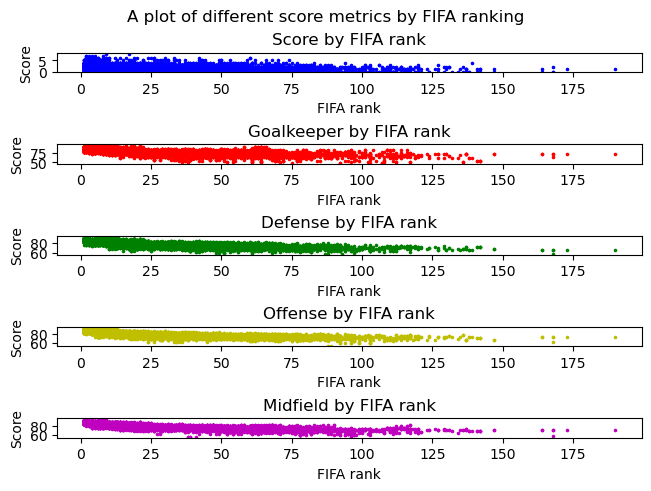

8232


In [2]:
# length of data == 8232 for both rank and pos_scores
data = []
reconstruct('match_history.csv', 'reconstructed_match_history.csv')
data = plot_fifa_score('match_history.csv')

print(len(data[0]))

In [3]:
import numpy as np
import pandas as pd

d = {'gk_score': [],
     'def_score': [],
     'mid_score': [],
     'atk_score': [],
    }

for i in range(8232):
    d['gk_score'].append([data[0][i],data[1][1][i]])
    d['def_score'].append([data[0][i],data[1][2][i]])
    d['mid_score'].append([data[0][i],data[1][3][i]])
    d['atk_score'].append([data[0][i],data[1][4][i]])

    
d['gk_score'] = np.array(d['gk_score']).astype(float)
d['def_score'] = np.array(d['def_score']).astype(float)
d['atk_score'] = np.array(d['atk_score']).astype(float)
d['mid_score'] = np.array(d['mid_score']).astype(float)

d
    
        

{'gk_score': array([[ 3., 94.],
        [67., 84.],
        [90., 83.],
        ...,
        [32., 78.],
        [12., 77.],
        [61., 76.]]),
 'def_score': array([[ 3. , 86.5],
        [67. , 80.2],
        [90. , 76.2],
        ...,
        [32. , 78. ],
        [12. , 75.8],
        [61. , 74.2]]),
 'mid_score': array([[ 3. , 89.3],
        [67. , 79.7],
        [90. , 73. ],
        ...,
        [32. , 81. ],
        [12. , 77.7],
        [61. , 77. ]]),
 'atk_score': array([[ 3. , 89.5],
        [67. , 81.8],
        [90. , 74. ],
        ...,
        [32. , 78. ],
        [12. , 75.8],
        [61. , 78. ]])}

Score: 0.33987625660544674


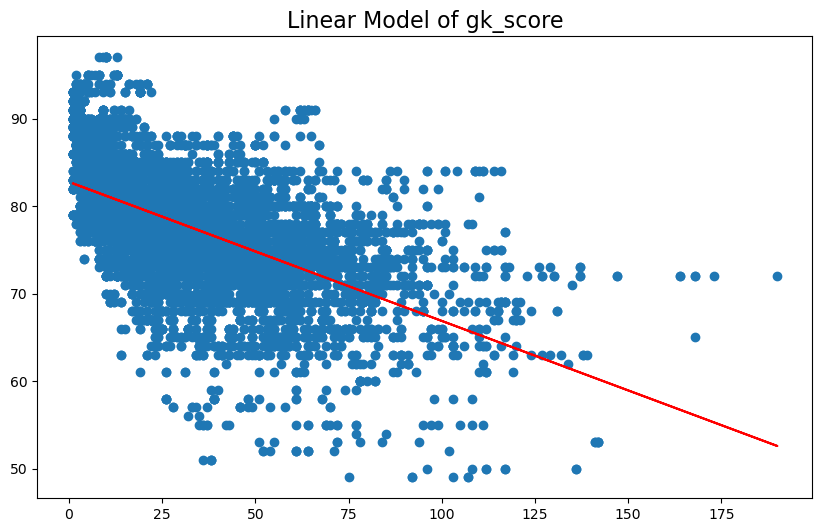

Score: 0.4566411420539598


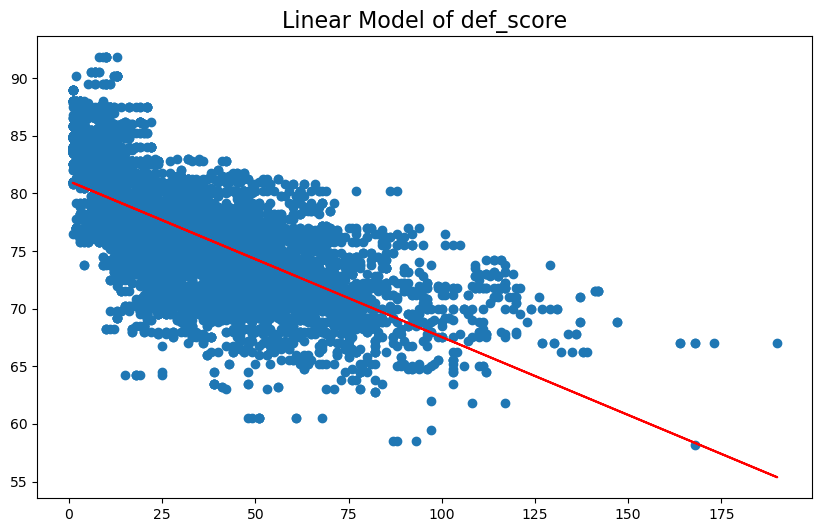

Score: 0.453174243928145


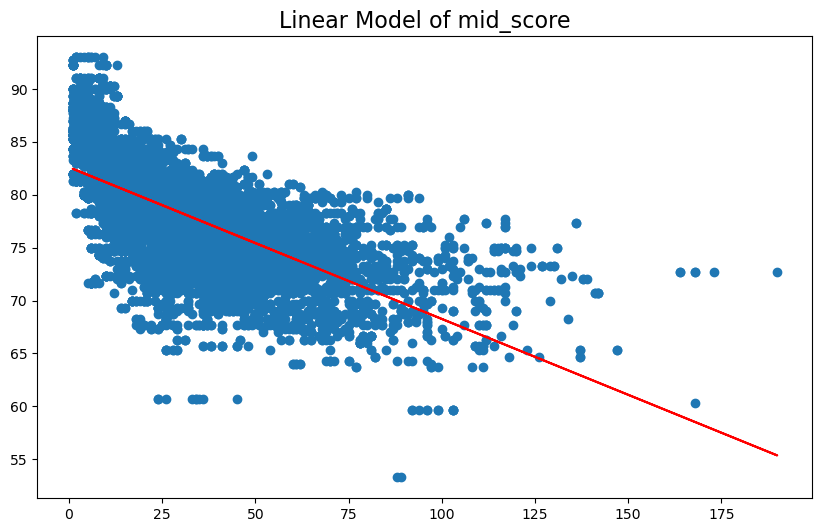

Score: 0.4893148508181151


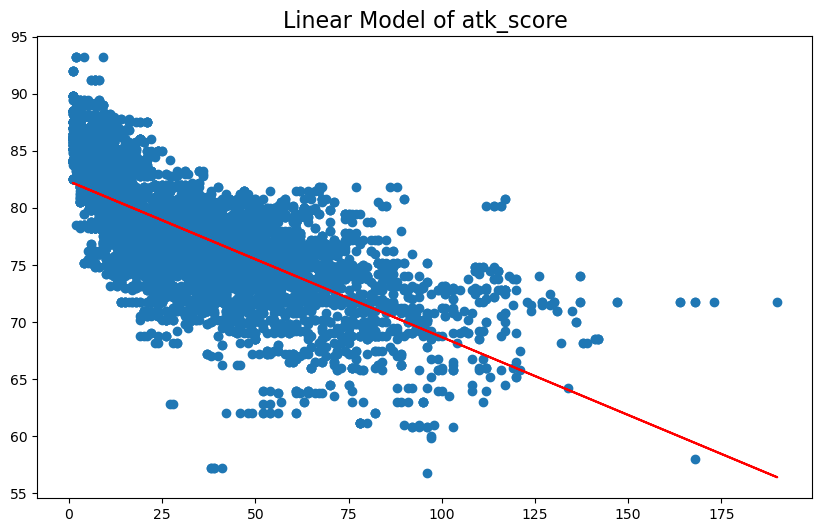

array([[74.81274363]])

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


def lr_model(model_data, pos_score):
    d = np.hsplit(model_data,2)
    rank = d[0]
    pos = d[1]
    
    train_input, test_input, train_target, test_target = train_test_split(
    rank, pos, random_state=42)
    
    lr = LinearRegression()

    lr.fit(train_input, train_target)
    print("Score: {}".format(lr.score(test_input, test_target)))
    
    y_predicted = lr.predict(rank)
    plt.figure(figsize=(10, 6))
    plt.title("Linear Model of {}".format(pos_score), size=16)
    plt.scatter(rank, pos)
    plt.plot(rank, y_predicted, c="red")
    plt.show()
    
    return lr

lr_gk = lr_model(d['gk_score'],'gk_score')
lr_def = lr_model(d['def_score'],'def_score')
lr_mid = lr_model(d['mid_score'],'mid_score')
lr_atk = lr_model(d['atk_score'],'atk_score')
lr_gk.predict([[50]])

### Collecting data of countries with missing values with no model data

In [5]:
train_dataset = r"./match_history.csv"
df = pd.read_csv(train_dataset)


#extract following columns
core_df = df[[
    "date", 
    "home_team", "away_team", 
    "home_team_fifa_rank", "away_team_fifa_rank",  
    'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
    'home_team_mean_defense_score', 'home_team_mean_offense_score',
    'home_team_mean_midfield_score', 'away_team_mean_defense_score',
    'away_team_mean_offense_score', 'away_team_mean_midfield_score',
    'home_team_result',
    ]].copy()

#simple data modification
core_df = core_df.fillna(0)
core_df["home_team_result"] = core_df["home_team_result"].replace(['Lose', 'Draw', 'Win'], [-1, 0, 1])
core_df['date'] = core_df['date'].str.replace(r"\D", "")


#variables 
home_score = [
    'home_team_goalkeeper_score', 
    'home_team_mean_defense_score', 
    'home_team_mean_offense_score',
    'home_team_mean_midfield_score',
]

away_score = [
    'away_team_goalkeeper_score',
    'away_team_mean_defense_score',
    'away_team_mean_offense_score', 
    'away_team_mean_midfield_score',
]

#country = np.unique(country_name, return_counts=True)
country_list = df['home_team'].values
country_list = np.unique(country_list)

pos_score = [
    'gk_score',
    'def_score',
    'mid_score',
    'atk_score'
    ]

core_df

/Users/minyong/opt/anaconda3/envs/BENG/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: The default value of regex will change from True to False in a future version.


,date,home_team,away_team,home_team_fifa_rank,away_team_fifa_rank,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,home_team_result
0,20040903,Spain,Scotland,3,67,94.0,84.0,86.5,89.3,89.5,80.2,79.7,81.8,0
1,20040904,Albania,Greece,94,14,0.0,90.0,0.0,59.0,74.5,82.8,83.7,85.2,1
2,20040904,Austria,England,90,7,83.0,88.0,76.2,73.0,74.0,90.5,88.7,91.2,0
3,20040904,Croatia,Hungary,25,76,77.0,74.0,80.5,78.7,79.0,71.8,75.7,70.2,1
4,20040904,Denmark,Ukraine,15,87,82.0,0.0,79.5,85.0,81.5,0.0,81.7,65.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5636,20211207,Algeria,Egypt,32,45,78.0,0.0,78.0,81.0,78.0,0.0,79.3,70.8,0
5637,20211208,Mexico,Chile,14,24,80.0,79.0,76.8,82.7,78.2,75.5,76.7,78.2,0
5638,20211211,Morocco,Algeria,28,32,82.0,78.0,81.2,81.7,76.2,78.0,81.0,78.0,-1
5639,20211218,Tunisia,Algeria,29,32,0.0,78.0,70.8,72.3,74.0,78.0,81.0,78.0,-1


In [6]:
scores = {}


for index, row in core_df.iterrows():
    home = row['home_team']
    away = row['away_team']
    
    if home not in scores:
        scores[home] = {}
        scores[home]['gk_score'] = []
        scores[home]['def_score'] = []
        scores[home]['mid_score'] = []
        scores[home]['atk_score'] = []
        
    if away not in scores:
        scores[away] = {}
        scores[away]['gk_score'] = []
        scores[away]['def_score'] = []
        scores[away]['mid_score'] = []
        scores[away]['atk_score'] = []
    
    scores[home]['gk_score'].append([row['date'],row['home_team_fifa_rank'], row['home_team_goalkeeper_score']])
    scores[home]['def_score'].append([row['date'],row['home_team_fifa_rank'], row['home_team_mean_defense_score']])
    scores[home]['mid_score'].append([row['date'],row['home_team_fifa_rank'], row['home_team_mean_midfield_score']])
    scores[home]['atk_score'].append([row['date'],row['home_team_fifa_rank'],row['home_team_mean_offense_score']])
    
    scores[away]['gk_score'].append([row['date'], row['away_team_fifa_rank'], row['away_team_goalkeeper_score']])
    scores[away]['def_score'].append([row['date'], row['away_team_fifa_rank'], row['away_team_mean_defense_score']])
    scores[away]['mid_score'].append([row['date'], row['away_team_fifa_rank'], row['away_team_mean_midfield_score']])
    scores[away]['atk_score'].append([row['date'], row['away_team_fifa_rank'],row['away_team_mean_offense_score']])
    
scores

{'Spain': {'gk_score': [['20040903', 3, 94.0],
   ['20040908', 3, 94.0],
   ['20041009', 4, 94.0],
   ['20041117', 4, 94.0],
   ['20050326', 5, 94.0],
   ['20050608', 8, 94.0],
   ['20050817', 8, 94.0],
   ['20050903', 8, 95.0],
   ['20051008', 8, 95.0],
   ['20051112', 8, 95.0],
   ['20051116', 8, 95.0],
   ['20060301', 6, 95.0],
   ['20060527', 5, 95.0],
   ['20060607', 5, 95.0],
   ['20060614', 5, 95.0],
   ['20060619', 5, 95.0],
   ['20060627', 5, 95.0],
   ['20060815', 7, 95.0],
   ['20060906', 7, 89.0],
   ['20061007', 10, 89.0],
   ['20061011', 10, 89.0],
   ['20061115', 10, 89.0],
   ['20070207', 12, 89.0],
   ['20070324', 10, 89.0],
   ['20070328', 10, 89.0],
   ['20070822', 8, 89.0],
   ['20070908', 8, 89.0],
   ['20071013', 7, 89.0],
   ['20071017', 7, 89.0],
   ['20071117', 6, 89.0],
   ['20071121', 6, 89.0],
   ['20080206', 4, 89.0],
   ['20080326', 4, 89.0],
   ['20080531', 4, 89.0],
   ['20080604', 4, 89.0],
   ['20080610', 4, 89.0],
   ['20080614', 4, 89.0],
   ['200806

In [7]:
# fetch according country, position_team_mean_score from dict scores 
# Since Nan replaced with 0s, if 0 not included in the data, returns an empty list 
# => no missing values, no prediction needed
def fetch_country_pos_score(country, pos_score):
    predict_target = []
    model_data = []
    
    for item in scores[country][pos_score]:
        if 0 in item:
            predict_target.append(item)
        else:
            model_data.append(item)
            
    if predict_target == []:
        #print("No missing values")
        return []
            
    else:   
        data = [model_data, predict_target,country, pos_score]

        # model_data and predict_target to np float array
        data[0] = np.array(data[0]).astype(float)
        data[1] = np.array(data[1]).astype(float)

        return data

#fetch_country_pos_score('Albania','gk_score')

In [8]:
def no_data_country_scores():
    targets = []
    
    for country in country_list:
        for score in pos_score:
            data = fetch_country_pos_score(country, score)
            
            if data == []:
                continue
            model_data = data[0]
            
            if model_data.size == 0:
                targets.append("{} {}".format(country,score))
    
    return targets

t = no_data_country_scores()
t

['Armenia def_score',
 'Azerbaijan def_score',
 'Azerbaijan atk_score',
 'Comoros atk_score',
 'Iraq gk_score',
 'Iraq atk_score',
 'Jordan gk_score',
 'Jordan atk_score',
 'Kenya def_score',
 'Luxembourg atk_score',
 'Madagascar gk_score',
 'Madagascar atk_score',
 'Malta def_score',
 'Malta mid_score',
 'Oman def_score',
 'Oman mid_score',
 'Sierra Leone gk_score',
 'Uganda gk_score',
 'Uganda atk_score',
 'Zambia gk_score',
 'Zambia def_score',
 'Zimbabwe gk_score']

In [9]:
target_scores = {}
target_keys = []

for elem in t:
    sp = elem.split(" ")
    
    if len(sp) > 2:
        result = ' '.join(sp[:-1])
        sp = [result,sp[-1]]
    
    target_keys.append(sp)
    
    if sp[0] not in target_scores:
        target_scores[sp[0]] = {}
        
    if sp[1] not in target_scores[sp[0]]:
        target_scores[sp[0]][sp[1]] = []
        
    target_scores[sp[0]][sp[1]] = scores[sp[0]][sp[1]]

target_scores
print(target_keys)

[['Armenia', 'def_score'], ['Azerbaijan', 'def_score'], ['Azerbaijan', 'atk_score'], ['Comoros', 'atk_score'], ['Iraq', 'gk_score'], ['Iraq', 'atk_score'], ['Jordan', 'gk_score'], ['Jordan', 'atk_score'], ['Kenya', 'def_score'], ['Luxembourg', 'atk_score'], ['Madagascar', 'gk_score'], ['Madagascar', 'atk_score'], ['Malta', 'def_score'], ['Malta', 'mid_score'], ['Oman', 'def_score'], ['Oman', 'mid_score'], ['Sierra Leone', 'gk_score'], ['Uganda', 'gk_score'], ['Uganda', 'atk_score'], ['Zambia', 'gk_score'], ['Zambia', 'def_score'], ['Zimbabwe', 'gk_score']]


In [10]:
for elem in target_keys:
    country = elem[0]
    pos_score = elem[1]
    
    data = fetch_country_pos_score(country, pos_score)
    print(data)

[array([], dtype=float64), array([[2.0120911e+07, 5.3000000e+01, 0.0000000e+00],
       [2.0121012e+07, 6.4000000e+01, 0.0000000e+00],
       [2.0130326e+07, 8.4000000e+01, 0.0000000e+00],
       [2.0130611e+07, 8.9000000e+01, 0.0000000e+00],
       [2.0130906e+07, 6.6000000e+01, 0.0000000e+00],
       [2.0130910e+07, 6.6000000e+01, 0.0000000e+00],
       [2.0131011e+07, 5.5000000e+01, 0.0000000e+00],
       [2.0131015e+07, 5.5000000e+01, 0.0000000e+00],
       [2.0140305e+07, 3.0000000e+01, 0.0000000e+00],
       [2.0140531e+07, 3.3000000e+01, 0.0000000e+00],
       [2.0140606e+07, 3.8000000e+01, 0.0000000e+00],
       [2.0160904e+07, 1.0200000e+02, 0.0000000e+00],
       [2.0161008e+07, 1.1200000e+02, 0.0000000e+00],
       [2.0161011e+07, 1.1200000e+02, 0.0000000e+00],
       [2.0161111e+07, 1.2500000e+02, 0.0000000e+00],
       [2.0170610e+07, 6.8000000e+01, 0.0000000e+00],
       [2.0170901e+07, 7.2000000e+01, 0.0000000e+00],
       [2.0170904e+07, 7.2000000e+01, 0.0000000e+00],
 

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def predict_scores_lr(data):
    #data[1] contains model_data which should be empty in these cases
    country = data[2]
    pos_score = data[3]
    
    if pos_score == 'gk_score':
        lr = lr_gk
    elif pos_score == 'def_score':
        lr = lr_def
    elif pos_score == 'mid_score':
        lr = lr_mid
    else:
        lr = lr_atk
        
    predict_target = data[1]
    print()
    
    d = np.hsplit(predict_target,3)

    d[2] = lr.predict(d[1])
    d[1] = np.array(d[1]).astype(int)

    complete_data = np.hstack(d).tolist()

    for elem in complete_data:
        elem[2] = float(elem[2])

    complete_data.append(country)
    complete_data.append(pos_score)

    return complete_data


dd = fetch_country_pos_score('Armenia', 'def_score')
predict_scores_lr(dd)

[[20120911.0, 53.0, 73.88599892381347],
 [20121012.0, 64.0, 72.39934940847661],
 [20130326.0, 84.0, 69.69635028968233],
 [20130611.0, 89.0, 69.02060050998377],
 [20130906.0, 66.0, 72.12904949659719],
 [20130910.0, 66.0, 72.12904949659719],
 [20131011.0, 55.0, 73.61569901193404],
 [20131015.0, 55.0, 73.61569901193404],
 [20140305.0, 30.0, 76.9944479104269],
 [20140531.0, 33.0, 76.58899804260776],
 [20140606.0, 38.0, 75.91324826290918],
 [20160904.0, 102.0, 67.26365108276748],
 [20161008.0, 112.0, 65.91215152337034],
 [20161011.0, 112.0, 65.91215152337034],
 [20161111.0, 125.0, 64.15520209615406],
 [20170610.0, 68.0, 71.85874958471776],
 [20170901.0, 72.0, 71.3181497609589],
 [20170904.0, 72.0, 71.3181497609589],
 [20171005.0, 83.0, 69.83150024562205],
 [20190323.0, 101.0, 67.39880103870719],
 [20190326.0, 101.0, 67.39880103870719],
 [20190611.0, 106.0, 66.72305125900863],
 [20210902.0, 88.0, 69.15575046592348],
 [20210905.0, 88.0, 69.15575046592348],
 [20211008.0, 89.0, 69.0206005099837

In [12]:
for elem in target_keys:
    country = elem[0]
    pos_score = elem[1]
    
    ccd = fetch_country_pos_score(country, pos_score)
    target_scores[country][pos_score] = predict_scores_lr(ccd)
    
print(target_scores)























{'Armenia': {'def_score': [[20120911.0, 53.0, 73.88599892381347], [20121012.0, 64.0, 72.39934940847661], [20130326.0, 84.0, 69.69635028968233], [20130611.0, 89.0, 69.02060050998377], [20130906.0, 66.0, 72.12904949659719], [20130910.0, 66.0, 72.12904949659719], [20131011.0, 55.0, 73.61569901193404], [20131015.0, 55.0, 73.61569901193404], [20140305.0, 30.0, 76.9944479104269], [20140531.0, 33.0, 76.58899804260776], [20140606.0, 38.0, 75.91324826290918], [20160904.0, 102.0, 67.26365108276748], [20161008.0, 112.0, 65.91215152337034], [20161011.0, 112.0, 65.91215152337034], [20161111.0, 125.0, 64.15520209615406], [20170610.0, 68.0, 71.85874958471776], [20170901.0, 72.0, 71.3181497609589], [20170904.0, 72.0, 71.3181497609589], [20171005.0, 83.0, 69.83150024562205], [20190323.0, 101.0, 67.39880103870719], [20190326.0, 101.0, 67.39880103870719], [20190611.0, 106.0, 66.72305125900863], [20210902.0, 88.0, 69.15575046592348], [20210905.0, 88.0, 69.15575046592348], [20211008.0

In [13]:
reconstructed_data = scores

for k in target_scores:
    for score in target_scores[k]:
        new_list = [(str(elem[0])) for elem in target_scores[k][score]]
        reconstructed_data[k][score] = new_list
    
reconstructed_data

{'Spain': {'gk_score': [['20040903', 3, 94.0],
   ['20040908', 3, 94.0],
   ['20041009', 4, 94.0],
   ['20041117', 4, 94.0],
   ['20050326', 5, 94.0],
   ['20050608', 8, 94.0],
   ['20050817', 8, 94.0],
   ['20050903', 8, 95.0],
   ['20051008', 8, 95.0],
   ['20051112', 8, 95.0],
   ['20051116', 8, 95.0],
   ['20060301', 6, 95.0],
   ['20060527', 5, 95.0],
   ['20060607', 5, 95.0],
   ['20060614', 5, 95.0],
   ['20060619', 5, 95.0],
   ['20060627', 5, 95.0],
   ['20060815', 7, 95.0],
   ['20060906', 7, 89.0],
   ['20061007', 10, 89.0],
   ['20061011', 10, 89.0],
   ['20061115', 10, 89.0],
   ['20070207', 12, 89.0],
   ['20070324', 10, 89.0],
   ['20070328', 10, 89.0],
   ['20070822', 8, 89.0],
   ['20070908', 8, 89.0],
   ['20071013', 7, 89.0],
   ['20071017', 7, 89.0],
   ['20071117', 6, 89.0],
   ['20071121', 6, 89.0],
   ['20080206', 4, 89.0],
   ['20080326', 4, 89.0],
   ['20080531', 4, 89.0],
   ['20080604', 4, 89.0],
   ['20080610', 4, 89.0],
   ['20080614', 4, 89.0],
   ['200806